### Saving image dataset and labels as npy. Train / Test ratio is 0.8/0.2

Data are images from Shoji et al, 2018 converted to npy and loaded to test classifying them with algorithms different than neural network.

- Thanks to Luis Pizano github.com/Luchopizano for the code with different algorithms implementation for classification.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


### Loading data from npy

In [2]:
# no need to import as train - test sets as crossvalidation is applied

(x_train, y_train), (x_test, y_test) = (np.load("train_imgs.npy"), np.load("train_labels.npy")), (np.load("test_imgs.npy"), np.load("test_labels.npy"))
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (781, 50, 50, 3) - y_train shape: (781,)
x_test shape: (196, 50, 50, 3) - y_test shape: (196,)


In [4]:
def convert_array(array): 
    """Split numpy array into n subarrays to make single column.
    For example, convert array of shape (781,50,50,3) to array of shape (781, 7500)"""
    return array.reshape(array.shape[0], -1)

In [5]:
X_train = convert_array(x_train)

In [6]:
X_train.shape

(781, 7500)

## Algorithms to use


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10,weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear',gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators = 120, max_features="sqrt")))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.617196 (0.026611)
LDA: 0.583850 (0.023032)
KNN: 0.669656 (0.024694)
CART: 0.558261 (0.009673)
NB: 0.605658 (0.020960)
SVM: 0.642805 (0.019530)
RFC: 0.722187 (0.019745)


## Comparation of algorithms

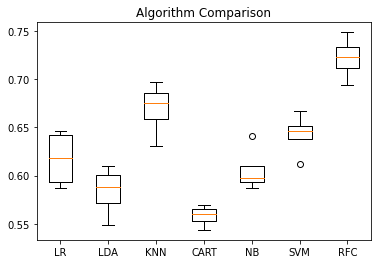

In [9]:

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Best classifier is random forest so continue with that one

In [10]:
# convert x_test to valid format

X_test = convert_array(x_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier



# Instantiate model with 200 decision trees
model4 = RandomForestClassifier(n_estimators = 120, max_features="sqrt", random_state =42)
clf = model4.fit(X_train, y_train)
predictions4 = model4.predict(X_test)

# Evaluate predictions of logistic regression model
results4[L] = accuracy_score(y_test, predictions4)    
print(str(np.argmax(results4)) + " " + str(np.max(results4)))


0 0.7397959183673469
